<a href="https://www.kaggle.com/code/pawarrakesh/titanic-dataset?scriptVersionId=109889558" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
test=pd.read_csv('../input/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train=pd.read_csv('../input/titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
test.drop(['Cabin','Name','Ticket'], axis = 1 ,inplace = True)
train.drop(['Cabin','Name','Ticket'], axis =1 , inplace = True)

In [7]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Embarked'].isna().sum()

0

In [8]:
train['Age']=train['Age'].fillna(train['Age'].median())
train['Age'].isna().sum()

0

In [9]:
test['Fare']=train['Fare'].fillna(train['Fare'].mode)
test['Fare'].isna().sum()

0

In [10]:
test['Age']=train['Age'].fillna(train['Age'].median())
test['Age'].isna().sum()

0

In [11]:
train['Sex']=[1.0 if x=='male' else 0.0 for x in train['Sex']]
test['Sex']=[1.0 if x=='male' else 0.0 for x in test['Sex']]

<AxesSubplot:>

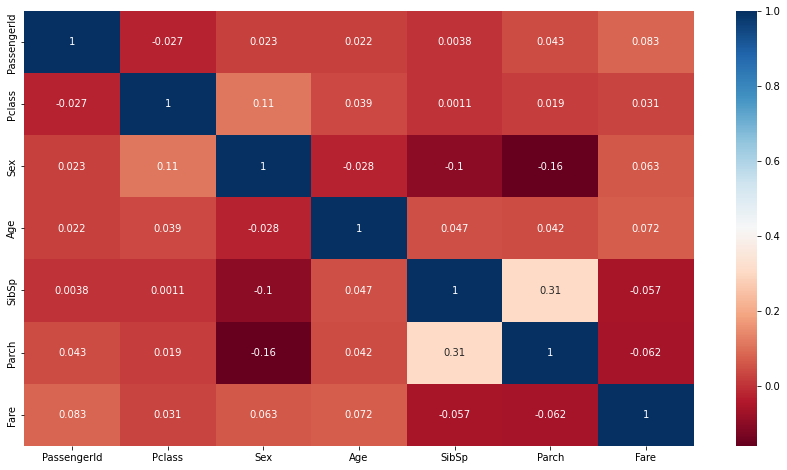

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(test.corr(), cmap="RdBu", annot=True)

<AxesSubplot:>

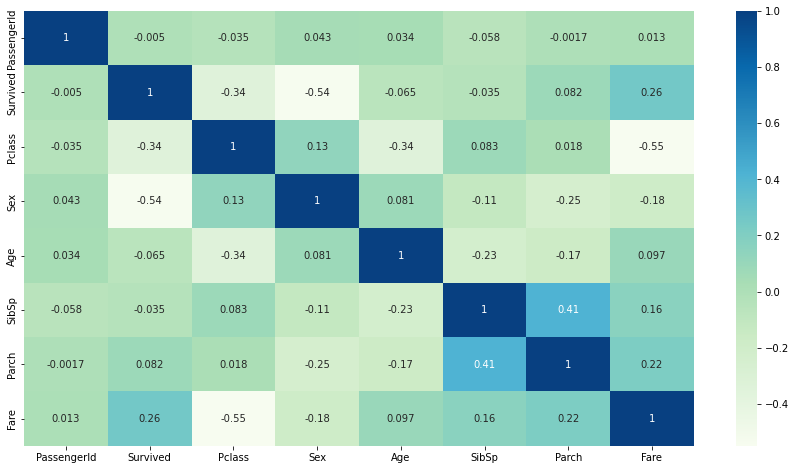

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), cmap="GnBu", annot=True)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [15]:
features= train.copy()
features.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,S
1,2,1,1,0.0,38.0,1,0,71.2833,C
2,3,1,3,0.0,26.0,0,0,7.9250,S
3,4,1,1,0.0,35.0,1,0,53.1000,S
4,5,0,3,1.0,35.0,0,0,8.0500,S


In [16]:
one_hot_encoded_training_predictors = pd.get_dummies(features)
data=one_hot_encoded_training_predictors 

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['embarked']= le.fit_transform(train['Embarked'])
test['embarked'] = le.fit_transform(test.Embarked)

train.drop(['Embarked'],axis=1,inplace = True)
test.drop(['Embarked'],axis=1, inplace = True)

In [18]:
y = train.loc[:,'Survived'].values # target
X = train.drop(['Survived'], axis = 1)  # predictor
print("X - ", X.shape, "\ny - ", y.shape)

X -  (891, 8) 
y -  (891,)


In [19]:
best=SelectKBest(score_func=chi2, k=6)
fit=best.fit(X,y)

In [20]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [21]:
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

       Feature        Score
6         Fare  4518.319091
2          Sex    92.702447
1       Pclass    30.873699
3          Age    21.649163
7     embarked    10.202525
5        Parch    10.097499
0  PassengerId     3.312934
4        SibSp     2.581865


In [22]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=True)

In [23]:
from sklearn.linear_model import LogisticRegression
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[90 16]
 [21 52]]


Accuracy of Logistic Regression: 79.3296089385475 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       106
           1       0.76      0.71      0.74        73

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

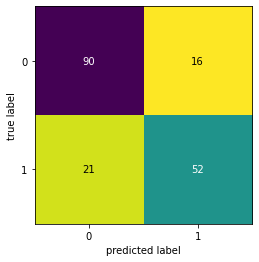

In [24]:
plot_confusion_matrix(confusion_matrix(test_y, lr_predict), cmap = "viridis_r")

In [25]:
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted,labels=(1,0))
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[45 28]
 [10 96]]


Accuracy of Random Forest: 78.77094972067039 

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       106
           1       0.82      0.62      0.70        73

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

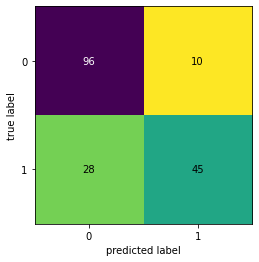

In [26]:
plot_confusion_matrix(confusion_matrix(test_y, rf_predicted), cmap = "viridis_r")

In [27]:
lr.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [28]:
final = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':lr.predict(test)})
final.to_csv('titanic_model_pre.csv',index= False)
pd.read_csv('titanic_model_pre.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
